In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# reading the 1900 to 1999
df = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrice1990.csv")
# reading the 2000 to 2012
df = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices2000.csv")
# reading the 2012 to 2014
df = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPricesMar2012toDec2014.csv")
# reading the 2015 to 2016
df = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices2015toDec2016.csv")
# reading the 2017 to 2024
df = pd.read_csv("C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\Resaleflatprices2017.csv")

In [3]:
# List of file names to merge
files = [
    r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrice1990.csv",
    r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices2000.csv",
   r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPricesMar2012toDec2014.csv",
    r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\ResaleFlatPrices2015toDec2016.csv",
    r"C:\\GUVI\\NewVM\\SingaporeFlat_Resale\\Resaleflatprices2017.csv"
]

In [4]:
merged_data = pd.DataFrame()
dataframes = []
# Loop through the list of file names and read their data into DataFrames
for file_name in files:
    df = pd.read_csv(file_name)
    dataframes.append(df)

# Concatenate the DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)

# Save the merged data to a new CSV file
combined_data.to_csv('combined_file.csv', index=False)

In [5]:
combined_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
921673,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62 years 07 months
921674,2024-03,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,830000.0,63 years 04 months
921675,2024-03,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,820000.0,63 years 05 months
921676,2024-03,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 05 months


The data above shows the information of resale HDB purchased between 1990 to 2024. However, not all data is suitable for analysis. Therefore, I made some assumption as follow:

Street name and block is irrelevant (town is sufficient for analysis, as no description of impact of the address, e.g., near MRT or not)
Flat model are either similar to room type (2 room, multi generation, etc.) or it reflected how old the unit is, which can be represented by lease commence date and remaining lease.
Month and Lease commencement date allow us to know when the unit was build. However, we will be able to know the age of the building when it was sold from the remaining lease.
I will drop column ['month','street_name','flat_model','lease_commence_date','block'] in my analysis

In [6]:
hdb_df = combined_data

In [7]:
hdb_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
921673,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62 years 07 months
921674,2024-03,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,830000.0,63 years 04 months
921675,2024-03,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,820000.0,63 years 05 months
921676,2024-03,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 05 months


In [8]:
hdb_df.shape

(921678, 11)

In [9]:
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921678 entries, 0 to 921677
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                921678 non-null  object 
 1   town                 921678 non-null  object 
 2   flat_type            921678 non-null  object 
 3   block                921678 non-null  object 
 4   street_name          921678 non-null  object 
 5   storey_range         921678 non-null  object 
 6   floor_area_sqm       921678 non-null  float64
 7   flat_model           921678 non-null  object 
 8   lease_commence_date  921678 non-null  int64  
 9   resale_price         921678 non-null  float64
 10  remaining_lease      212628 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.4+ MB


In [10]:
hdb_df.columns.tolist()

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [11]:
#spliting the month column to "Year", "month", "day"
hdb_df["month"] = pd.to_datetime(hdb_df["month"], format="%Y-%m")
hdb_df["year"] = hdb_df["month"].dt.year
hdb_df["month"] = hdb_df["month"].dt.month
hdb_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990


In [12]:
hdb_df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
921673,3,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62 years 07 months,2024
921674,3,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,830000.0,63 years 04 months,2024
921675,3,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,820000.0,63 years 05 months,2024
921676,3,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 05 months,2024
921677,3,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,780000.0,62 years 10 months,2024


In [13]:
# check for missing values:
hdb_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
dtype: int64

In [14]:
#checking duplicate values 
hdb_df.nunique()

month                    12
town                     27
flat_type                 8
block                  2706
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9430
remaining_lease         724
year                     35
dtype: int64

In [15]:
# Calculate lease end year
lease_end_year = 99 + hdb_df['lease_commence_date']

# Calculate current remaining lease year
hdb_df['current_remaining_lease_years'] = lease_end_year - hdb_df['year']

In [16]:
hdb_df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [17]:
hdb_df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,current_remaining_lease_years
921673,3,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62 years 07 months,2024,62
921674,3,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,830000.0,63 years 04 months,2024,63
921675,3,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,820000.0,63 years 05 months,2024,63
921676,3,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 05 months,2024,63
921677,3,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,780000.0,62 years 10 months,2024,62


In [18]:
# for analysis i need not consider street name, block and  flat model is relevant (town is sufficient for analysis, as no description of impact of the address, e.g., near MRT or not). Some information in flat model are either similar to room type (2 room, multi generation, etc.) or it reflected how old the unit is, which can be represented by lease commence date and remaining lease.Therefore. I will drop this column for my analysis
hdb_df = hdb_df.drop(['month','street_name','flat_model','lease_commence_date', 'block', 'remaining_lease'], axis=1)

In [19]:
# Let's rename the column for clear understandingg
hdb_df = hdb_df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [20]:
# I assume EXECUTIVE is equal to a 6 room (5 room + 1 study room). MULTI-GENERATION is equal to a 5 room (it served the same purpose).
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'MULTI GENERATION','5 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [21]:
# I assume that rather we use floor range, I the possible highest floor within the unit storey range.
hdb_df['storey'] = hdb_df['storey'].str[-2:].astype('int')

In [22]:
# Observe whether there is missing data or not.
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921678 entries, 0 to 921677
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   town                           921678 non-null  object 
 1   number_of_rooms                921678 non-null  int32  
 2   storey                         921678 non-null  int32  
 3   floor_area_sqm                 921678 non-null  float64
 4   resale_price                   921678 non-null  float64
 5   year                           921678 non-null  int32  
 6   current_remaining_lease_years  921678 non-null  int64  
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 38.7+ MB


In [24]:
hdb_df.isna().sum()

town                             0
number_of_rooms                  0
storey                           0
floor_area_sqm                   0
resale_price                     0
year                             0
current_remaining_lease_years    0
dtype: int64

No missing data, so we can analyze the data

##HDB Data Analysis

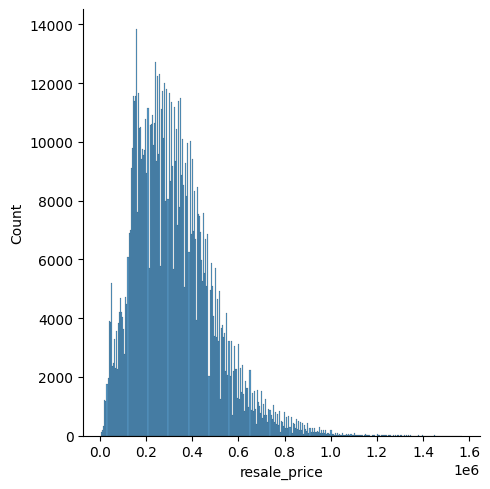

In [25]:
# First, we want to se ethe distribution of HDB resale price in Singapore
sns.displot(hdb_df['resale_price'])

Seems the distribution is slighly skewed to the right.

In [26]:
# Let see the statistic information of the data
hdb_df.describe()

,number_of_rooms,storey,floor_area_sqm,resale_price,year,current_remaining_lease_years
count,921678.000000,921678.000000,921678.000000,9.216780e+05,921678.000000,921678.000000
mean,4.012509,8.691724,95.694141,3.190988e+05,2006.062461,81.155545
std,0.946064,4.815328,25.835606,1.689890e+05,9.246044,10.663435
min,1.000000,3.000000,28.000000,5.000000e+03,1990.000000,41.000000
25%,3.000000,6.000000,73.000000,1.925000e+05,1999.000000,74.000000
50%,4.000000,9.000000,93.000000,2.950000e+05,2005.000000,83.000000
75%,5.000000,12.000000,113.000000,4.150000e+05,2013.000000,90.000000
max,6.000000,51.000000,307.000000,1.568888e+06,2024.000000,101.000000


Some information can be obtained from the statistic:

The number of room in the HDB typically sold is 4 room (3 bedroom + living room). Usually this might be a good start for first-time house owner starting new family
Typical 4-room HDB size is tyically around ~96 m2. New generation 4-room HDB has a typical size of 85 or 95 m2.
Most HDB has a a maximum lease of 101 years. we can see that average of house sold is 10 years old
Seems that HDB sold tends to be on mid-level storey. People might avoid low storey HDB because of the noise and lack of view
Some HDB price exceed 1 million SGD.

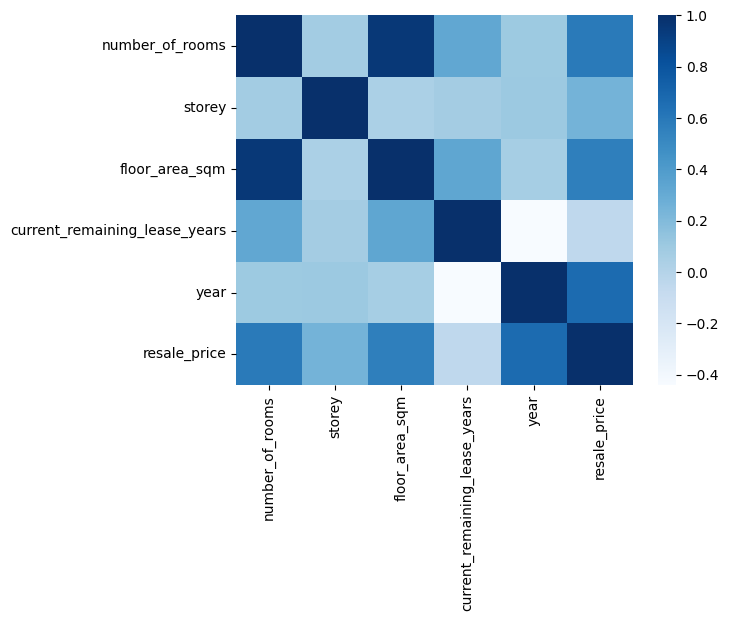

In [27]:
# Let us see the relation between each parameters
# Selecting specific columns and dropping the "town" column
selected_columns = ['number_of_rooms', 'storey', 'floor_area_sqm', 'current_remaining_lease_years', 'year','resale_price']
numeric_columns_selected = hdb_df[selected_columns].select_dtypes(include=['float64', 'int64','int32'])

# Create heatmap of correlations for selected numeric columns
sns.heatmap(numeric_columns_selected.corr(), cmap="Blues")
plt.show()

Number of rooms and floor area_sqm have high correlation to HDB resale price (around 0.83)

#Machine Learning Models (Regression)

Let start to prepare the date for our machine learning model. My aim here is to determine which model has the highest accuracy in predicting the HDB resale price. The models I will compare are:

Multi Linear Regression
Polynomial Regression
Ridge Regression
Lasso Regression
Elastic-Net Regression
Decision Tree
Random Forest

Simplification of categorical data using One Hot Encoder

We want to avoid ranking between each town. So I will use One Hot Encoder

In [28]:
hdb_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

Source: https://www.newlaunchesreview.com/regions-of-singapore/
As you can see, one hot encoding for the categorical features of "town" will led to datasets with too many columns. However, we are able to put some of this town under similar region, as shown in table above. Therefore, I will simplify the town to be consisted only of 5 category: North, South, East, West, and Central. Moreover, central category has already exist in the column itself, so it is reasonable to do the same for other town.

In [29]:
hdb_df = hdb_df.replace(dict.fromkeys(['SEMBAWANG','SENGKANG','WOODLANDS','YISHUN','LIM CHU KANG'], 'NORTH'))
hdb_df = hdb_df.replace(dict.fromkeys(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'], 'SOUTH'))
hdb_df = hdb_df.replace(dict.fromkeys(['BEDOK','GEYLANG','HOUGANG','KALLANG/WHAMPOA','PASIR RIS','PUNGGOL','SERANGOON','TAMPINES'], 'EAST'))
hdb_df = hdb_df.replace(dict.fromkeys(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'], 'WEST'))
hdb_df = hdb_df.replace(dict.fromkeys(['ANG MO KIO','CENTRAL AREA','BISHAN','MARINE PARADE','TOA PAYOH'], 'CENTRAL'))

In [30]:
# Let's check whether the data replacement was done properly
hdb_df['town'].unique()

array(['CENTRAL', 'EAST', 'WEST', 'SOUTH', 'NORTH'], dtype=object)

Great! Now we only have 5 categorical values in this column from original 26 categorical values.

In [31]:
hdb_df = hdb_df.rename(columns={'town':'region'})

In [32]:
X = hdb_df[['region', 'number_of_rooms', 'storey', 'floor_area_sqm','current_remaining_lease_years','year']].values
y= hdb_df['resale_price'].values

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [34]:
X[1,:]

array([1.0, 0.0, 0.0, 0.0, 0.0, 1, 6, 31.0, 86, 1990], dtype=object)

Great! Now all 5 categorical values is split into 5 column. Take note that and they are relocated to the first 5 columns

Split the cleaned dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
# Import neccessary library to evaluate the performance of each machine learning model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Multi Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_ypred = mlr.predict(X_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.8022816148588703

Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Let's determine the best degree for polynomial
for n in range(2,5):
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    pr = LinearRegression()
    pr.fit(X_poly, y_train)
    poly_ypred = pr.predict(poly_reg.transform(X_test))
    poly_acc = r2_score(y_test,poly_ypred)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_ypred))
    print(r'The accuracy of polynomial regression with degree of {} is {}'.format(n,poly_acc))
    print(r'The RMSE of polynomial regression with degree of {} is {}'.format(n,poly_rmse))

The accuracy of polynomial regression with degree of 2 is 0.8429323722799456
The RMSE of polynomial regression with degree of 2 is 67017.87200407816
The accuracy of polynomial regression with degree of 3 is 0.8429323722799456
The RMSE of polynomial regression with degree of 3 is 67017.87200407816
The accuracy of polynomial regression with degree of 4 is 0.8429323722799456
The RMSE of polynomial regression with degree of 4 is 67017.87200407816


Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
ridge_r = Ridge()
ridge_r.fit(X_train, y_train)
ridge_ypred = ridge_r.predict(X_test)
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_acc

0.8022829324426888

Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
lasso_r = Lasso(max_iter=100000)
lasso_r.fit(X_train, y_train)
lasso_ypred = lasso_r.predict(X_test)
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_acc

0.8022829855842389

Elastic Net Regression

In [41]:
from sklearn.linear_model import ElasticNet
EN_r = ElasticNet()
EN_r.fit(X_train, y_train)
EN_ypred = EN_r.predict(X_test)
EN_acc = r2_score(y_test,EN_ypred)
EN_acc

0.7699170889966382

Decision Tree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(X_train, y_train)
tree_ypred = tree_r.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.9459377981718491

Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(X_train, y_train)
forest_ypred = forest_r.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.9551481272199591

In [44]:

import pickle
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(forest_r,f)

Comparison of different model based on R2-score and RMSE (Root Mean Square Error)

C:\Users\Pradeeba\AppData\Local\Temp\ipykernel_3080\1401320706.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\Pradeeba\AppData\Local\Temp\ipykernel_3080\1401320706.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


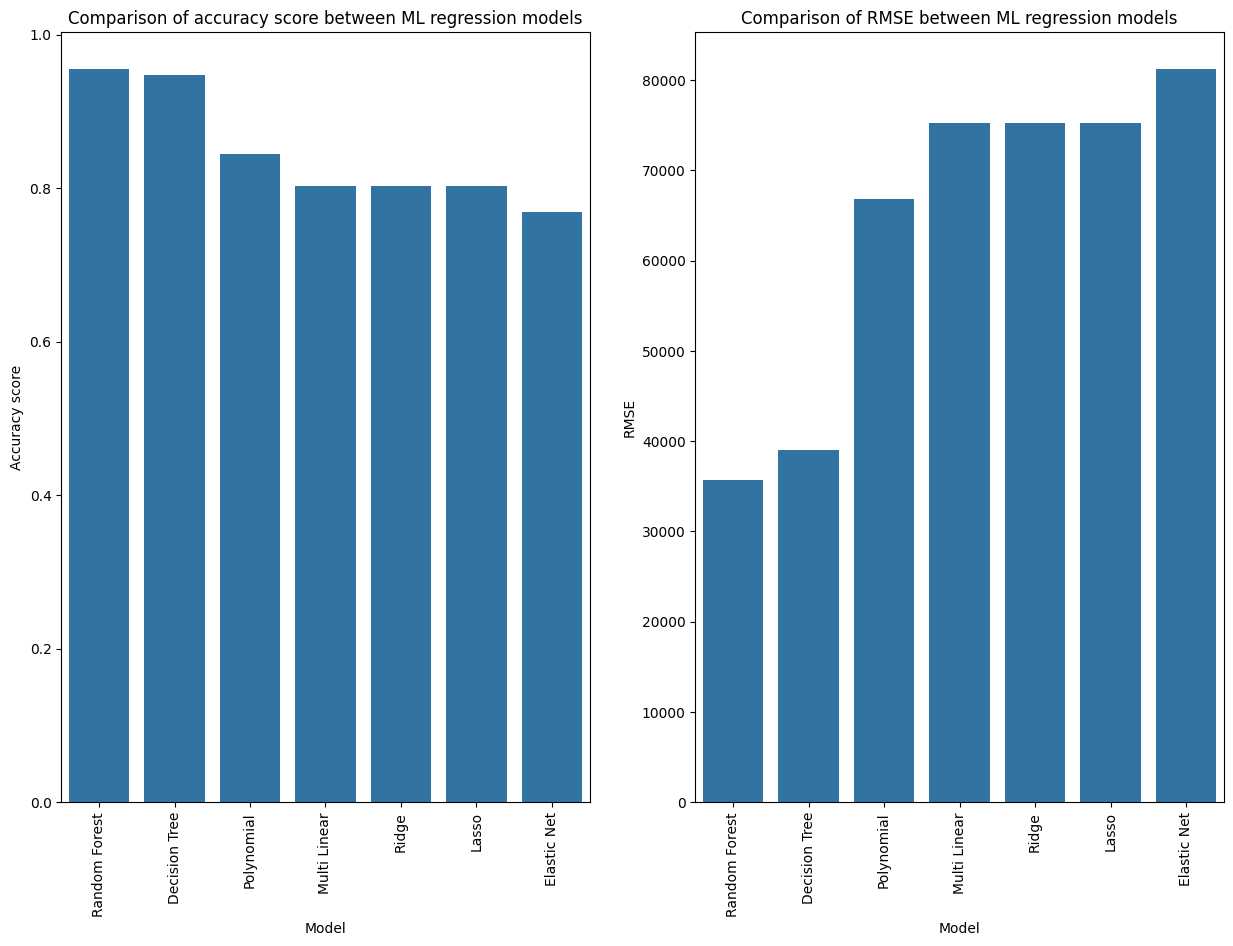

In [44]:
# Accuracy score for multi linear regression
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_rmse = np.sqrt(mean_squared_error(y_test,mlr_ypred))
# Evaluation for polynomial regression has been calculated in finding the best degree
# Evaluation for ridge regression
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_ypred))
# Evaluation for lasso regression
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_ypred))
# Evaluation for elastic net regression
EN_acc = r2_score(y_test,EN_ypred)
EN_rmse = np.sqrt(mean_squared_error(y_test,EN_ypred))
# Evaluation for decision trees regression
tree_acc = r2_score(y_test,tree_ypred)
tree_rmse = np.sqrt(mean_squared_error(y_test,tree_ypred))
# Evaluation for elastic random forest regression
forest_acc = r2_score(y_test,forest_ypred)
forest_rmse = np.sqrt(mean_squared_error(y_test,forest_ypred))
# Let's put it as a list and compare it in a bar chart
model_acc_score = [mlr_acc,poly_acc, ridge_acc, lasso_acc, EN_acc, tree_acc, forest_acc]
model_rmse = [mlr_rmse, poly_rmse, ridge_rmse, lasso_rmse, EN_rmse, tree_rmse, forest_rmse]
model_list = ['Multi Linear', 'Polynomial', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest']
model_result_df = pd.DataFrame(
    {'Model': model_list,
     'Accuracy score': model_acc_score,
     'RMSE': model_rmse
    })
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data=model_result_df, x='Model', y='Accuracy score', ax=ax1,order=model_result_df.sort_values('Accuracy score',ascending = False).Model).set_title("Comparison of accuracy score between ML regression models")
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=model_result_df, x='Model', y='RMSE', ax=ax2, order=model_result_df.sort_values('RMSE').Model).set_title("Comparison of RMSE between ML regression models")
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

As we can see from the above, Random Forest has the highest accuracy score (0.95) and lowest RMSE (30,600). Therefore, we will use Random Forest to predict the price of HDB resale flat

Checking how much is the price of 4-room HDB in different region?

Now the important things is to know what is the estimated price of resale HDB. Let's say a family with 2 people would like to buy a house with the following assumption:

4-room flat
9th floor (mid-storey to prevent noise)
House size of 95 m2 (typical new generation 4-rrom HDB)
Remaining lease is 75 years (average of remaining lease from all HDB combined)
So let's predict the price of resale HDB in different area.

In [45]:
# We know that after One Hot Encoding, the value of Central, East, North, South, and West is one at column 1,2,3,4, and 5, respectively (following alphabetical order).
area = ['Central','East','North','South','West']
pred_price_central = forest_r.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 2024, 75]])[0]
pred_price_east = forest_r.predict([[0.0, 1.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 2024, 75]])[0]
pred_price_north = forest_r.predict([[0.0, 0.0, 1.0, 0.0, 0.0, 4, 9, 95.0, 2024, 75]])[0]
pred_price_south = forest_r.predict([[0.0, 0.0, 0.0, 1.0, 0.0, 4, 9, 95.0, 2024, 75]])[0]
pred_price_west = forest_r.predict([[0.0, 0.0, 0.0, 0.0, 1.0, 4, 9, 95.0, 2024, 75]])[0]
resale_price = [pred_price_central,pred_price_east,pred_price_north,pred_price_south,pred_price_west]
predict_df = pd.DataFrame(list(zip(area, resale_price)),
              columns=['Area','Predicted HDB price (SGD)'])
predict_df.round()


,Area,Predicted HDB price (SGD)
0,Central,74599.0
1,East,68240.0
2,North,64134.0
3,South,116627.0
4,West,69320.0
